In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('bank_full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [3]:
#Information about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Handaling Duplicate values
data[data.duplicated()].shape

(0, 17)

In [5]:
# Value Counts for perticular Column
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [7]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [8]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [9]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [10]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [13]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [14]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Compairing different columns w.r.t  'y'

In [15]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['yes'], label = 'Yes', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['no'], label = 'No',bottom= data_col1['yes'], color= colors[1])
    ax1.set_title('comparision', fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    sns.countplot(x=col1, data=data,hue=col2 , ax = ax2)
    plt.xticks( rotation = 45, fontsize = 12)

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


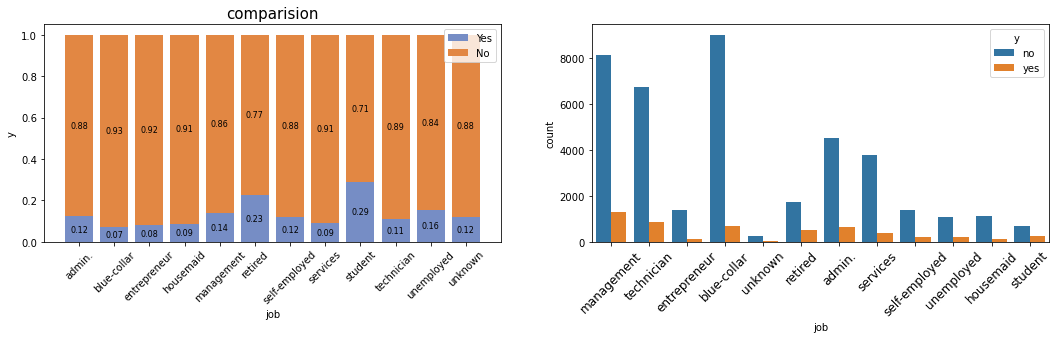

In [16]:
# Compare 'job' and 'y'
plot_rate_bar(data,'job','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


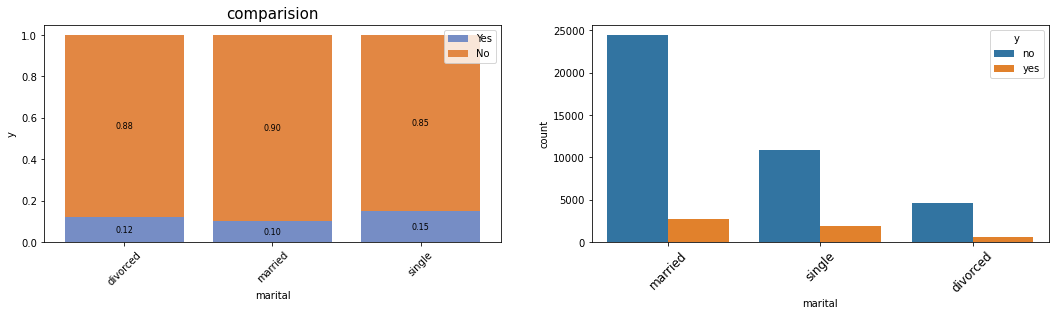

In [17]:
# Marital Column
plot_rate_bar(data,'marital','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


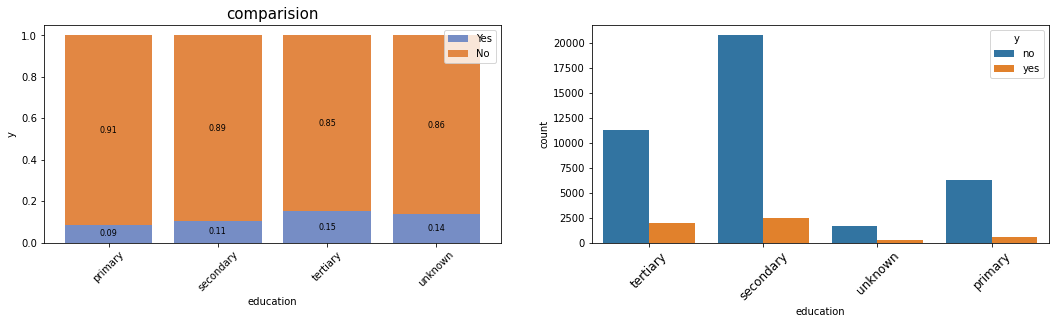

In [18]:
# Education Column
plot_rate_bar(data,'education','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


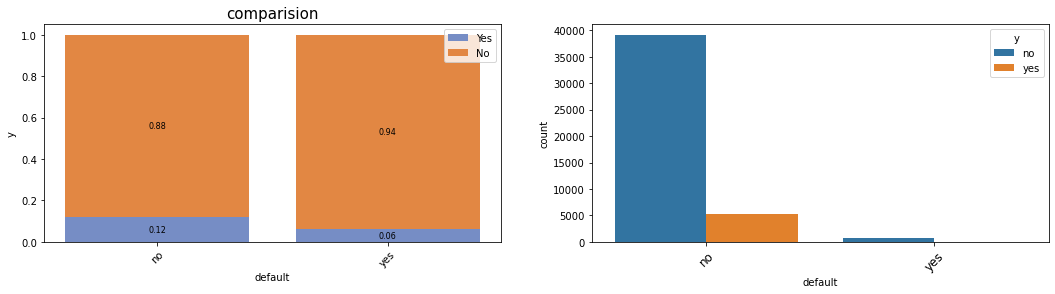

In [19]:
# Default Column
plot_rate_bar(data,'default','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


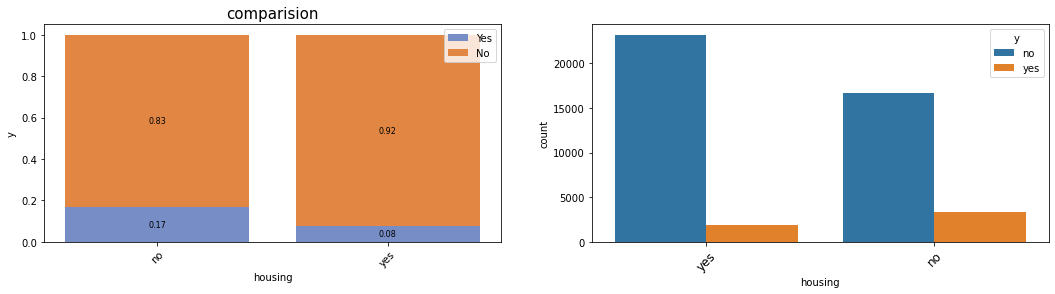

In [20]:
# Housing Column
plot_rate_bar(data,'housing','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


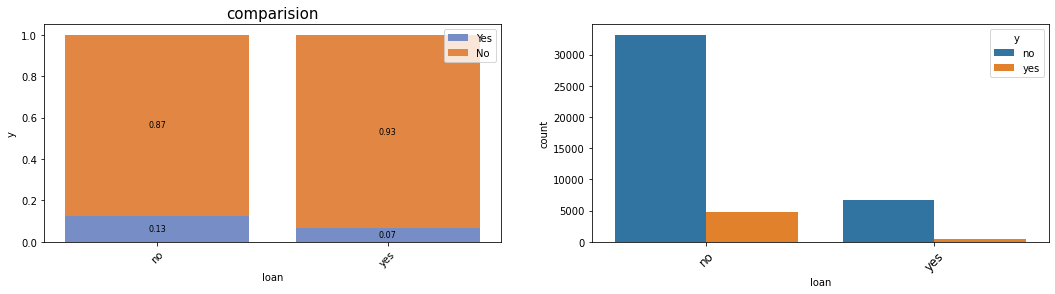

In [21]:
# Loan Column
plot_rate_bar(data,'loan','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


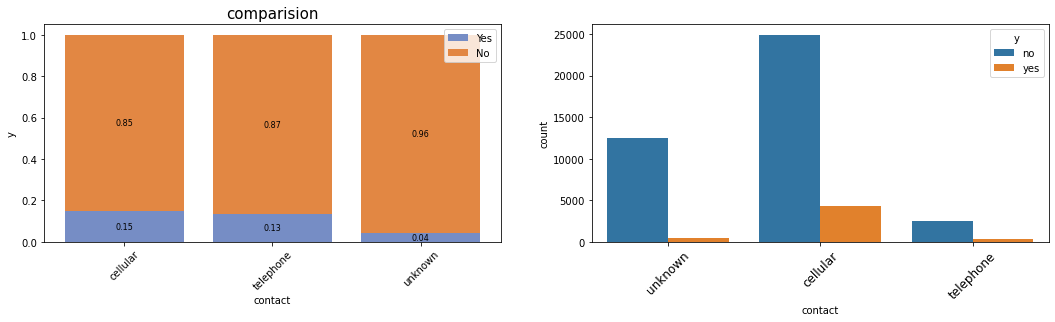

In [22]:
# Contact Column
plot_rate_bar(data,'contact','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


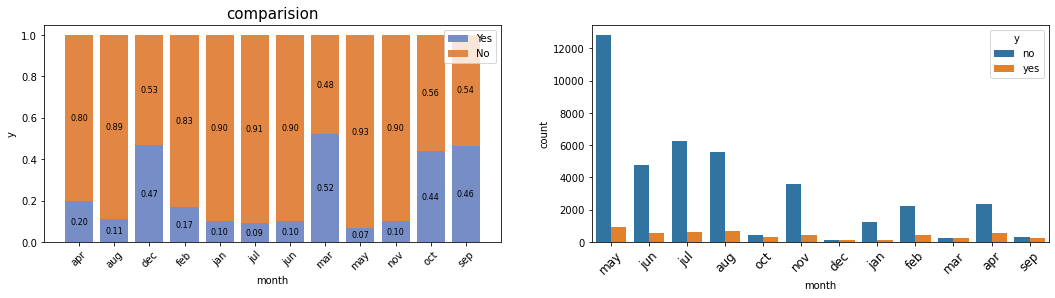

In [23]:
# Month Column
plot_rate_bar(data,'month','y')

C:\Users\ayush\AppData\Local\Temp/ipykernel_13396/3573909758.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


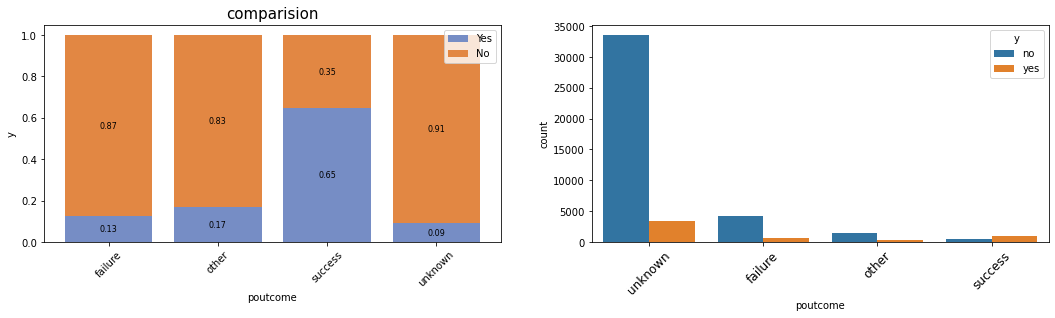

In [24]:
# Poutcome Column
plot_rate_bar(data,'poutcome','y')    

## Model Building Using all Columns

### Encoded using get_dummies method

In [25]:
data1 = pd.get_dummies(data)

data1 = data1.drop(['y_no', 'default_no' , 'housing_no' , 'loan_no'] , axis = 1)
data1 = data1.rename({'y_yes':'y'} , axis = 1)
data1.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
# Correlation Between columns
data1.corr()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763,0.093236
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,0.013225,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940,0.005637
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901,-0.019662


In [28]:
# Dividing into X and y
X = data1.iloc[:,0:48]
y = data1.iloc[:,48]

In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Model Building
from sklearn.linear_model import LogisticRegression

model_get = LogisticRegression(max_iter = 2000)
model_get.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

#### Training Accuracy

In [31]:
#Predict for X dataset
from sklearn.metrics import accuracy_score

y_pred_train = model_get.predict(X_train)
train_acc_get = round(accuracy_score(y_train, y_pred_train),3)
train_acc_get

0.902

#### Testing Accuracy

In [32]:
y_pred_test = model_get.predict(X_test)
test_acc_get = round(accuracy_score(y_test, y_pred_test),3)
test_acc_get

0.899

In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Encoded using Label Encoder

In [34]:
data2 = data.copy()
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
data2.shape

(45211, 17)

In [36]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data2.iloc[:,1] = le.fit_transform(data2.iloc[:,1])
data2.iloc[:,2] = le.fit_transform(data2.iloc[:,2])
data2.iloc[:,3] = le.fit_transform(data2.iloc[:,3])
data2.iloc[:,4] = le.fit_transform(data2.iloc[:,4])
data2.iloc[:,6] = le.fit_transform(data2.iloc[:,6])
data2.iloc[:,7] = le.fit_transform(data2.iloc[:,7])
data2.iloc[:,8] = le.fit_transform(data2.iloc[:,8])
data2.iloc[:,10] = le.fit_transform(data2.iloc[:,10])
data2.iloc[:,15] = le.fit_transform(data2.iloc[:,15])
data2.iloc[:,16] = le.fit_transform(data2.iloc[:,16])

In [38]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [39]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
# Correlation Between columns
data2.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [41]:
# Dividing into X and y
X = data2.iloc[:,0:16]
y = data2.iloc[:,16]

In [42]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# Model Building
model_leb = LogisticRegression(max_iter = 1900)
model_leb.fit(X_train,y_train)

LogisticRegression(max_iter=1900)

#### Training Accuracy

In [44]:
#Predict for X dataset
from sklearn.metrics import accuracy_score

y_pred_train = model_leb.predict(X_train)
train_acc_leb = round(accuracy_score(y_train, y_pred_train),3)
train_acc_leb

0.891

#### Testing Accuracy

In [45]:
y_pred_test = model_leb.predict(X_test)
test_acc_leb = round(accuracy_score(y_test, y_pred_test),3)
test_acc_leb

0.886

### Encoded using Target Encoder

In [46]:
data3 = data.copy()
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
data3.iloc[:,16] = le.fit_transform(data3.iloc[:,16])

from category_encoders import TargetEncoder

tr = TargetEncoder()


data3.iloc[:,1] = tr.fit_transform(data3.iloc[:,1],data3.iloc[:,16])
data3.iloc[:,2] = tr.fit_transform(data3.iloc[:,2],data3.iloc[:,16])
data3.iloc[:,3] = tr.fit_transform(data3.iloc[:,3],data3.iloc[:,16])
data3.iloc[:,4] = tr.fit_transform(data3.iloc[:,4],data3.iloc[:,16])
data3.iloc[:,6] = tr.fit_transform(data3.iloc[:,6],data3.iloc[:,16])
data3.iloc[:,7] = tr.fit_transform(data3.iloc[:,7],data3.iloc[:,16])
data3.iloc[:,8] = tr.fit_transform(data3.iloc[:,8],data3.iloc[:,16])
data3.iloc[:,10] = tr.fit_transform(data3.iloc[:,10],data3.iloc[:,16])
data3.iloc[:,15] = tr.fit_transform(data3.iloc[:,15],data3.iloc[:,16])


C:\Users\ayush\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\ayush\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [48]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0.117961,2143,0.077000,0.126557,0.040707,5,0.067195,261,1,-1,0,0.091615,0
1,44,0.110570,0.149492,0.105594,0.117961,29,0.077000,0.126557,0.040707,5,0.067195,151,1,-1,0,0.091615,0
2,33,0.082717,0.101235,0.105594,0.117961,2,0.077000,0.066814,0.040707,5,0.067195,76,1,-1,0,0.091615,0
3,47,0.072750,0.101235,0.135703,0.117961,1506,0.077000,0.126557,0.040707,5,0.067195,92,1,-1,0,0.091615,0
4,33,0.118056,0.149492,0.135703,0.117961,1,0.167024,0.126557,0.040707,5,0.067195,198,1,-1,0,0.091615,0


In [49]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
# Correlation Between columns
data3.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.153790,-0.393651,-0.111177,0.017879,0.097783,0.185513,0.015655,0.007461,-0.009120,0.081646,-0.004648,0.004760,-0.023758,0.001288,0.031483,0.025155
job,0.153790,1.000000,0.115531,0.242256,0.022935,0.066823,0.230775,0.071018,0.123228,-0.003219,0.184662,0.008919,-0.034066,0.004681,0.031266,0.096884,0.135990
marital,-0.393651,0.115531,1.000000,0.141353,-0.008075,-0.018826,0.020516,0.048555,0.033008,-0.007722,0.031655,0.022527,-0.027967,0.029459,0.016200,0.029305,0.065926
education,-0.111177,0.242256,0.141353,1.000000,0.014015,0.080297,0.101352,0.048952,0.131271,0.024676,0.081337,0.001684,0.009765,-0.003177,0.022694,0.055629,0.072695
default,0.017879,0.022935,-0.008075,0.014015,1.000000,0.066745,-0.006025,0.077234,0.018829,-0.009424,0.036926,0.010021,-0.016822,0.029979,0.018329,0.028242,0.022419
balance,0.097783,0.066823,-0.018826,0.080297,0.066745,1.000000,0.068768,0.084350,0.034827,0.004503,0.069998,0.021560,-0.014578,0.003435,0.016674,0.037659,0.052838
housing,0.185513,0.230775,0.020516,0.101352,-0.006025,0.068768,1.000000,0.041323,0.204348,0.027982,0.208459,-0.005075,0.023599,-0.124178,-0.037076,0.073763,0.139173
loan,0.015655,0.071018,0.048555,0.048952,0.077234,0.084350,0.041323,1.000000,-0.008277,-0.011370,0.067294,0.012412,-0.009980,0.022754,0.011043,0.055135,0.068185
contact,0.007461,0.123228,0.033008,0.131271,0.018829,0.034827,0.204348,-0.008277,1.000000,0.032651,0.250632,0.016273,-0.008972,0.248283,0.153553,0.156849,0.151355
day,-0.009120,-0.003219,-0.007722,0.024676,-0.009424,0.004503,0.027982,-0.011370,0.032651,1.000000,-0.064633,-0.030206,0.162490,-0.093044,-0.051710,-0.042471,-0.028348


In [51]:
# Dividing into X and y
X = data3.iloc[:,0:16]
y = data3.iloc[:,16]

In [52]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
# Model Building
model_tar = LogisticRegression(max_iter = 600)
model_tar.fit(X_train,y_train)

LogisticRegression(max_iter=600)

#### Training Accuracy

In [54]:
#Predict for X dataset
from sklearn.metrics import accuracy_score

y_pred_train = model_tar.predict(X_train)
train_acc_tar = round(accuracy_score(y_train, y_pred_train),3)
train_acc_tar

0.901

#### Testing Accuracy

In [55]:
y_pred_test = model_tar.predict(X_test)
test_acc_tar = round(accuracy_score(y_test, y_pred_test),3)
test_acc_tar

0.897

### Comparison b/w three Encodings

In [56]:
lt = [['Get_dummies',train_acc_get,test_acc_get] , ['Label Encoder',train_acc_leb,test_acc_leb],
      ['Target Encoder',train_acc_tar,test_acc_tar]]
accuracy_encoder = pd.DataFrame(lt , columns = ['Encoder_used' , 'Training_accuracy' , 'Testing_accuracy'])
accuracy_encoder

,Encoder_used,Training_accuracy,Testing_accuracy
0,Get_dummies,0.902,0.899
1,Label Encoder,0.891,0.886
2,Target Encoder,0.901,0.897


In [57]:
accuracy_encoder['Features_used'] = [data1.shape[1] , data2.shape[1] , data3.shape[1]] 

In [58]:
accuracy_encoder

,Encoder_used,Training_accuracy,Testing_accuracy,Features_used
0,Get_dummies,0.902,0.899,49
1,Label Encoder,0.891,0.886,17
2,Target Encoder,0.901,0.897,17


+ we use Target Encoder to encode our Categorical Data

## Improving Model

+ From correlation in Target Encoded Dataset we have observed that 4 columns have less correlation with y. Soe we decided to drop them and Build the Model

In [59]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0.117961,2143,0.077000,0.126557,0.040707,5,0.067195,261,1,-1,0,0.091615,0
1,44,0.110570,0.149492,0.105594,0.117961,29,0.077000,0.126557,0.040707,5,0.067195,151,1,-1,0,0.091615,0
2,33,0.082717,0.101235,0.105594,0.117961,2,0.077000,0.066814,0.040707,5,0.067195,76,1,-1,0,0.091615,0
3,47,0.072750,0.101235,0.135703,0.117961,1506,0.077000,0.126557,0.040707,5,0.067195,92,1,-1,0,0.091615,0
4,33,0.118056,0.149492,0.135703,0.117961,1,0.167024,0.126557,0.040707,5,0.067195,198,1,-1,0,0.091615,0


In [60]:
data4 = data3.drop(['age' , 'default' , 'day' , 'campaign'] , axis = 1)
data4.head()

,job,marital,education,balance,housing,loan,contact,month,duration,pdays,previous,poutcome,y
0,0.137556,0.101235,0.150064,2143,0.077000,0.126557,0.040707,0.067195,261,-1,0,0.091615,0
1,0.110570,0.149492,0.105594,29,0.077000,0.126557,0.040707,0.067195,151,-1,0,0.091615,0
2,0.082717,0.101235,0.105594,2,0.077000,0.066814,0.040707,0.067195,76,-1,0,0.091615,0
3,0.072750,0.101235,0.135703,1506,0.077000,0.126557,0.040707,0.067195,92,-1,0,0.091615,0
4,0.118056,0.149492,0.135703,1,0.167024,0.126557,0.040707,0.067195,198,-1,0,0.091615,0


In [61]:
data4.shape

(45211, 13)

In [62]:
# Dividing into X and y
X = data4.iloc[:,0:12]
y = data4.iloc[:,12]

In [63]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# Model Building
model_imp = LogisticRegression()
model_imp.fit(X_train,y_train)

LogisticRegression()

#### Training Accuracy

In [65]:
#Predict for X dataset
from sklearn.metrics import accuracy_score

y_pred_train = model_imp.predict(X_train)
train_acc_imp = round(accuracy_score(y_train, y_pred_train),3)
train_acc_imp

0.901

#### Testing Accuracy

In [66]:
y_pred_test = model_imp.predict(X_test)
test_acc_imp = round(accuracy_score(y_test, y_pred_test),3)
test_acc_imp

0.897

In [67]:
accuracy_encoder.loc[3] = ['Target Encoder',train_acc_imp,test_acc_imp,data4.shape[1]]
accuracy_encoder

,Encoder_used,Training_accuracy,Testing_accuracy,Features_used
0,Get_dummies,0.902,0.899,49
1,Label Encoder,0.891,0.886,17
2,Target Encoder,0.901,0.897,17
3,Target Encoder,0.901,0.897,13


### AUC-ROC Curve

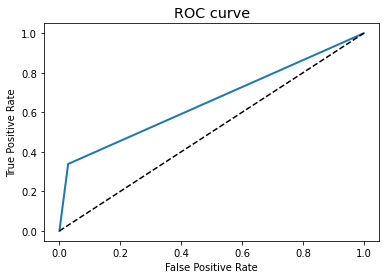

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()